In [1]:
    %pylab
%matplotlib inline
import scipy.stats

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/home/ca/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cosh', 'isinf', 'hypot', 'exp', 'trunc', 'sinh', 'isclose', 'nan', 'radians', 'fabs', 'cos', 'floor', 'ceil', 'log', 'ldexp', 'tanh', 'degrees', 'sqrt', 'expm1', 'gamma', 'frexp', 'sin', 'isfinite', 'fmod', 'log10', 'isnan', 'log1p', 'inf', 'e', 'log2', 'tan', 'copysign', 'modf', 'pi']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
pylab.rcParams['figure.figsize'] = (10, 6)

### Kupfer

In [3]:
Cu1 = [767 - 35, 1612 - 84, 2366 - 168, 3154 - 168, 3938 - 172, 4718 - 172]
Cu2 = [2380 - 1900, 2380 - 1130, 2380 - 300, 3220 - 370]
Cu3 = [3590 - 2360, 3590 - 1570, 3590 - 770, 3590 - 20]

In [4]:
diff(Cu1)
diff(Cu2)
diff(Cu3)
dCu = concatenate([diff(Cu1), diff(Cu2), diff(Cu3)])

array([796, 670, 788, 780, 780])

array([770, 830, 770])

array([790, 800, 750])

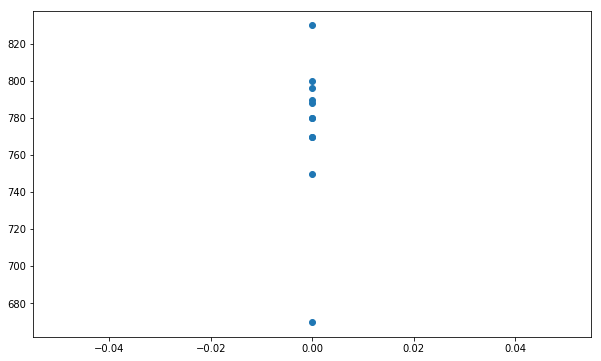

In [5]:
plt.plot(zeros_like(dCu), dCu, 'o')

In [6]:
TCu = mean(dCu); err_TCu = std(dCu, ddof=1)
print(f'{TCu:f} +- {err_TCu:f}')

774.909091 +- 40.292566


In [7]:
lCu = 1.498 # m
cCu = 2 * lCu / TCu * 1e6 # millisekunden in sekunden
err_cCu = 2 * lCu / TCu**2 * err_TCu * 1e6
print(f'{cCu:f} +- {err_cCu:f}')

3866.259972 +- 201.032016


CRC Handbook S. 14-41

### Plastik

In [8]:
P1 = [7400, 6160, 4760, 3440]
P2 = [7440, 6160, 4760, 3440]
P3 = [7400, 6120, 4840, 3560]

In [9]:
diff(P1)
diff(P2)
diff(P3)
dP = abs(concatenate([diff(P1), diff(P2), diff(P3)]))

array([-1240, -1400, -1320])

array([-1280, -1400, -1320])

array([-1280, -1280, -1280])

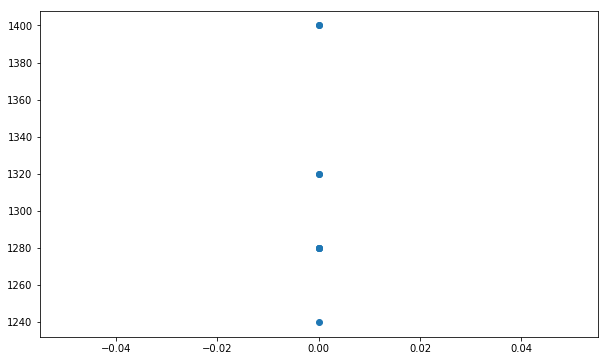

In [10]:
plt.plot(zeros_like(dP), dP, 'o')

In [11]:
TP = mean(dP); err_TP = std(dP, ddof=1)
print(f'{TP:f} +- {err_TP:f}')

1311.111111 +- 55.777335


In [12]:
lP = 1.024 # m
cP = 2 * lP / TP * 1e6 # millisekunden in sekunden
err_cP = 2 * lP / TP**2 * err_TP * 1e6
print(f'{cP:f} +- {err_cP:f}')

1562.033898 +- 66.452101


### Aluminimium

In [13]:
Al1 = [2280, 1710, 1070, 460]
Al2 = [2260, 1690, 1070, 440]
Al3 = [2270, 1700, 1050, 460]

In [14]:
diff(Al1)
diff(Al2)
diff(Al3)
dAl = abs(concatenate([diff(Al1), diff(Al2), diff(Al3)]))

array([-570, -640, -610])

array([-570, -620, -630])

array([-570, -650, -590])

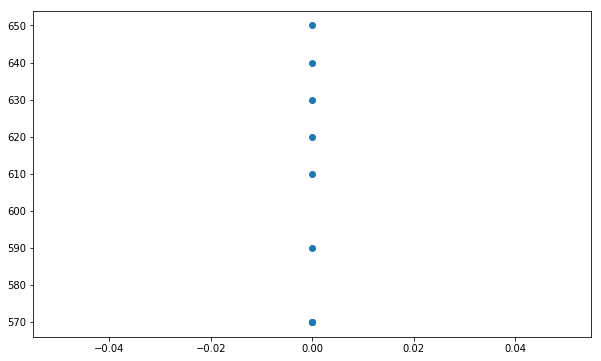

In [15]:
plt.plot(zeros_like(dAl), dAl, 'o')

In [16]:
TAl = mean(dAl); err_TAl = std(dAl, ddof=1)
print(f'{TAl:f} +- {err_TAl:f}')

605.555556 +- 31.666667


In [17]:
lAl = 1.499 # m
cAl = 2 * lAl / TAl * 1e6 # millisekunden in sekunden
err_cAl = 2 * lAl / TAl**2 * err_TAl * 1e6
print(f'{cAl:f} +- {err_cAl:f}')

4950.825688 +- 258.896389


## Elasizitätsmodule

$E = \rho {c_\mathrm{S}}^2$

In [18]:
rhoCu, rhoAl, rhoP = 8.95e3, 2.7e3, 1.4e3
err_rhoCu, err_rhoAl, err_rhoP = .05e3, .1e3, .2e3
E_Cu = rhoCu * cCu**2
err_E_Cu = sqrt((cCu * 2*rhoCu * err_rhoCu)**2 +
                (rhoCu**2 * err_cCu)**2)
print(f'{E_Cu:f} +- {err_E_Cu:f}') # kg^2 m^-5 s^-1


133784297220.468521 +- 16470752378.437643


In [19]:
for m in ['Cu', 'Al', 'P']:
    rho, c, err_rho, err_c = \
        eval(f'rho{m}, c{m}, err_rho{m}, err_c{m}')
    E = rho * c**2 * 1e-9 # GPa
    # err_E = sqrt((c**2 * err_rho)**2 +
    #              ((rho * 2*c * err_c))**2) * 1e-9
    err_E = rho * 2*c * err_c * 1e-9
    # (c**2 * err_rho) * 1e-6
    # (rho * 2*c * err_c) * 1e-6
    print(f'{m}: {E:f} +- {err_E:f} MPa') # kg^2 m^-5 s^-1
    exec(f'E{m} = {E}; err_E{m} = {err_E}')

Cu: 133.784297 +- 13.912632 MPa
Al: 66.178822 +- 6.921455 MPa
P: 3.415930 +- 0.290641 MPa


# Aufgabe 3

In [20]:
f1 = 1001.5; err_f1 = 1.0
f2 = 651.68; err_f2 = 0.03
f3 = 1508.6; err_f3 = 0.3
ERR_f = [.1, .01, .1]

In [21]:
_, m1auf, m1ab = loadtxt('freq1.csv', delimiter=',', skiprows=1).T
_, m2auf, m2ab = loadtxt('freq2.csv', delimiter=',', skiprows=1).T
_, m3auf, m3ab = loadtxt('freq3.csv', delimiter=',', skiprows=1).T

In [22]:
m1 = .5*m1auf + .5*m1ab
m2 = .5*m2auf + .5*m2ab
m3 = .5*m3auf + .5*m3ab

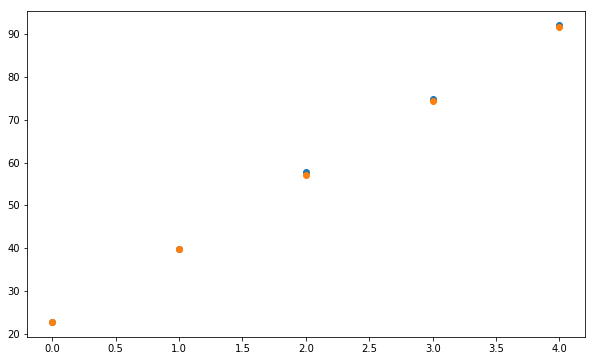

In [23]:
plt.plot(m1auf, 'o')
plt.plot(m1ab, 'o')

In [24]:
concatenate([m1ab, m1auf])

array([22.8, 39.9, 57. , 74.4, 91.6, 22.8, 39.9, 57.7, 74.8, 92. ])

In [25]:
a1, b1, _, _, err_a1 = scipy.stats.linregress(2*list(range(2, len(m1)+2)), concatenate([m1ab, m1auf]))
a2, b2, _, _, err_a2 = scipy.stats.linregress(2*list(range(2, len(m2)+2)), concatenate([m2ab, m2auf]))
a3, b3, _, _, err_a3 = scipy.stats.linregress(2*list(range(2, len(m3)+2)), concatenate([m3ab, m3auf]))

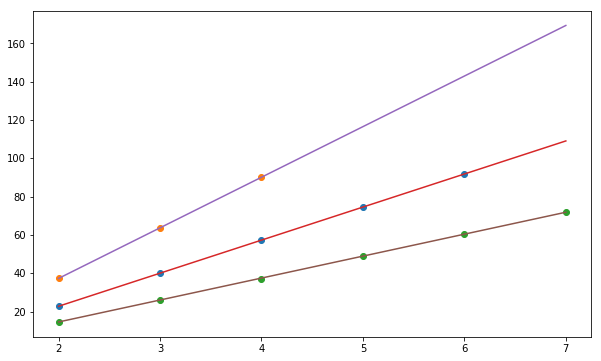

In [26]:
plt.plot(2 + arange(len(m1)), m1, 'o')
plt.plot(2 + arange(len(m2)), m2, 'o')
plt.plot(2 + arange(len(m3)), m3, 'o')
x = linspace(2, 7)
plt.plot(x, transpose([a1*x + b1, a2*x + b2, a3*x + b3]))

In [27]:
print(f'{a1:.5} +- {err_a1:.3}\t\t{b1:.4}')
print(f'{a2:.5} +- {err_a2:.3}\t{b2:.4}')
print(f'{a3:.5} +- {err_a3:.3}\t{b3:.4}')

17.27 +- 0.0531		-11.79
26.425 +- 0.119	-15.56
11.466 +- 0.0593	-8.396


In [28]:
print(f'{2*a1:.6} +- {2*err_a1:.3}')
print(f'{2*a2:.6} +- {2*1.2*err_a2:.3}')
print(f'{2*a3:.6} +- {2*err_a3:.3}')

34.54 +- 0.106
52.85 +- 0.285
22.9314 +- 0.119


In [29]:
f = array([f1, f2, f3]); err_f = array([err_f1, err_f2, err_f3])
l = 2*array([a1, a2, a3]); err_l = 2*array([err_a1, err_a2, err_a3])

In [30]:
v = f*l * 1e-2
v

array([345.9181    , 344.41288   , 345.94353143])

In [31]:
err_v = sqrt((f*err_l * 1e-2)**2 + (err_f*l * 1e-2)**2)
print(err_v)
print(f*err_l * 1e-2)
print(err_f*l * 1e-2)

[1.11811726 1.54853557 1.78913069]
[1.06343079 1.5484544  1.78780759]
[0.3454     0.015855   0.06879429]


In [37]:
c = sum(1/err_v**2 * v) / sum(1/err_v**2)
err_c = sqrt(1/sum(1/err_v))
ERR1_c = sum(1/err_v**2 * ERR_f * l*1e-2) / sum(1/err_v**2)
c, err_c, ERR1_c, c*0.001
c, sqrt(err_c**2 + (c*0.001)**2)

(345.5128420328139,
 0.6902196175970401,
 0.024191182271005286,
 0.3455128420328139)

(345.5128420328139, 0.7718693182951349)